In [102]:
# random forest works good at  every ml problems beacuse
# it reduces the high variance without increasing the high bias


#


# in ml problems our targets has been always to reduce high variance
# as well as  high bais:

#  how it works :

#  we give randomly  the some amount of the data form original dataset

# suppose 100 are outliers then may at one dt ..model randomly take
# 50 , 40 or 30 noist ...by this only one dt not have to be struggle with
# noisy and high vairance ..all got soem outliers then it will be easy
# to bear the noisy datset from single model

#  the data which we gives that are noisy ...and  our datset
#  by randomly give some amount of data to all decision tree
#  models  hence by which  all the model gets some noisy data
#  hence autiomatic high variance decreases.....
#  without increasing the high bais.....


In [103]:
# lets see the code example and tries to visualize :
# how it works :

In [104]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [105]:
np.random.seed(4)
x , y = make_circles(n_samples=500, factor = 0.1 ,noise = 0.35 ,
                     random_state=42)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)


In [106]:
x.shape


(500, 2)

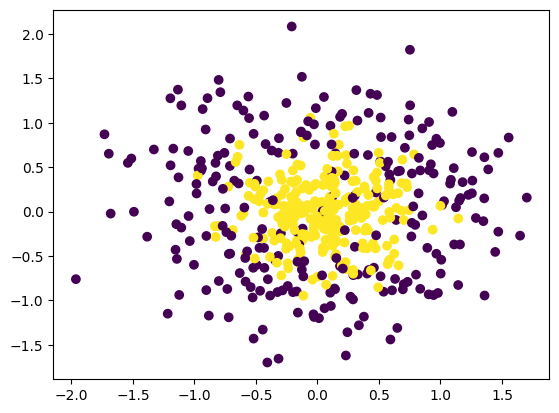

In [107]:
plt.scatter(x[:,0] ,x[: , 1] , c = y)

# it is a classification dataset

# only two class it has blue and yellow
# it loks like circle types scattered  plotting

In [108]:
from sklearn.tree import DecisionTreeClassifier

**single decision tree is overfitting my model**

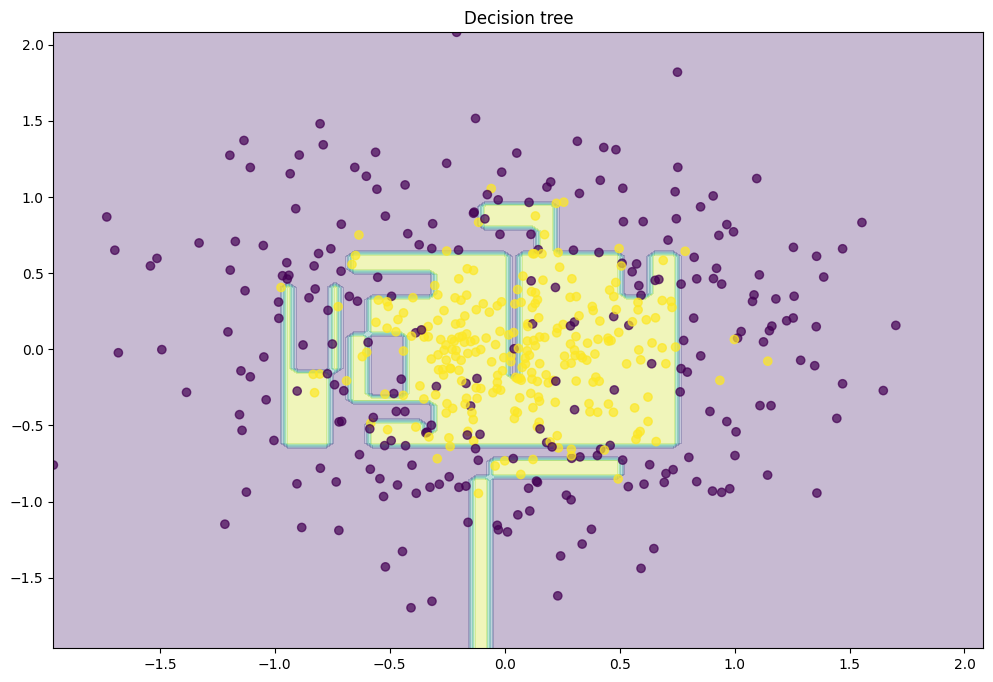

In [109]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train , y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(x.min() , x.max() , 100)
xx1 , xx2 = np.meshgrid(x_range , x_range)
y_hat = dtree.predict(np.c_[xx1.ravel() , xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1 , xx2 , y_hat , alpha=0.3)
plt.scatter(x[:,0] , x[:,1] , c=y , cmap = "viridis" , alpha = 0.7)
plt.title("Decision tree")
plt.show()

# fully grown decision tree
# here we could see that that  regions  is trying to touch datapoints
# means overfitting ...means low bais and high variance....


# good at training data : because it is high variance
# and also bais is low : so it will be bad at testing data

**applying random forest to reduce the high variance**

In [110]:
# from here we trying to apply theory by code to reduce the high variance


from sklearn.ensemble import RandomForestClassifier

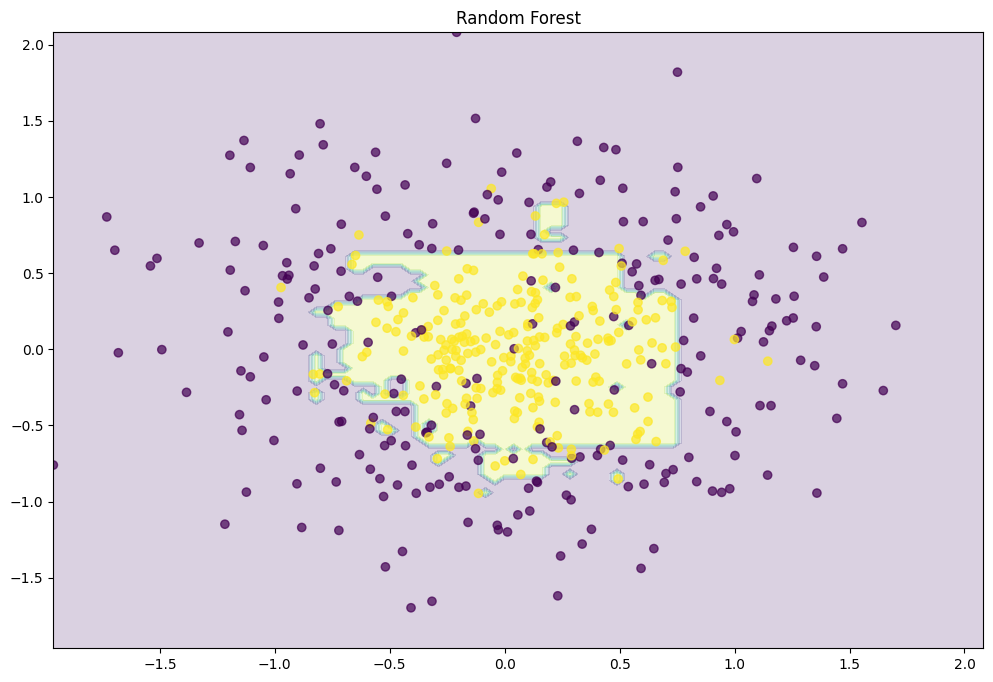

In [111]:

rf = RandomForestClassifier(n_estimators = 500 , random_state =  0)
# we used 500 decision trees
# to get this result
rf.fit(x_train , y_train)

plt.figure(figsize = (12 , 8))
x_range = np.linspace(x.min() , x.max() , 100)
xx1 , xx2 = np.meshgrid(x_range , x_range)
y_hat = rf.predict(np.c_[xx1.ravel() , xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1 , xx2 , y_hat , alpha = 0.2)
plt.scatter(x[: ,0 ], x[: , 1] , c = y , cmap = "viridis" , alpha = .7)
plt.title("Random Forest")
plt.show()

# now our random forest plot a right curve by which  on an  average
# it draws the best fit line  where the two datsats on an average
# differes from each other

**how random forest algorithm reduces the  high variance in
regression dataset**

In [121]:
import numpy as np

# function for the underlying curve
def f(x):
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

# function to generate dataset
def generate(n_samples, noise=0.1):
    X = np.random.rand(n_samples) * 10 - 5   # random samples between -5 and 5
    X = np.sort(X).ravel()
    y = np.exp(-X **2) + 1.5*np.exp(-X**2) + np.random.normal(0.0,
                                                          noise , n_samples)
      # add Gaussian noise

    X = X.reshape((n_samples, 1))

    return X, Y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


NameError: name 'Y' is not defined

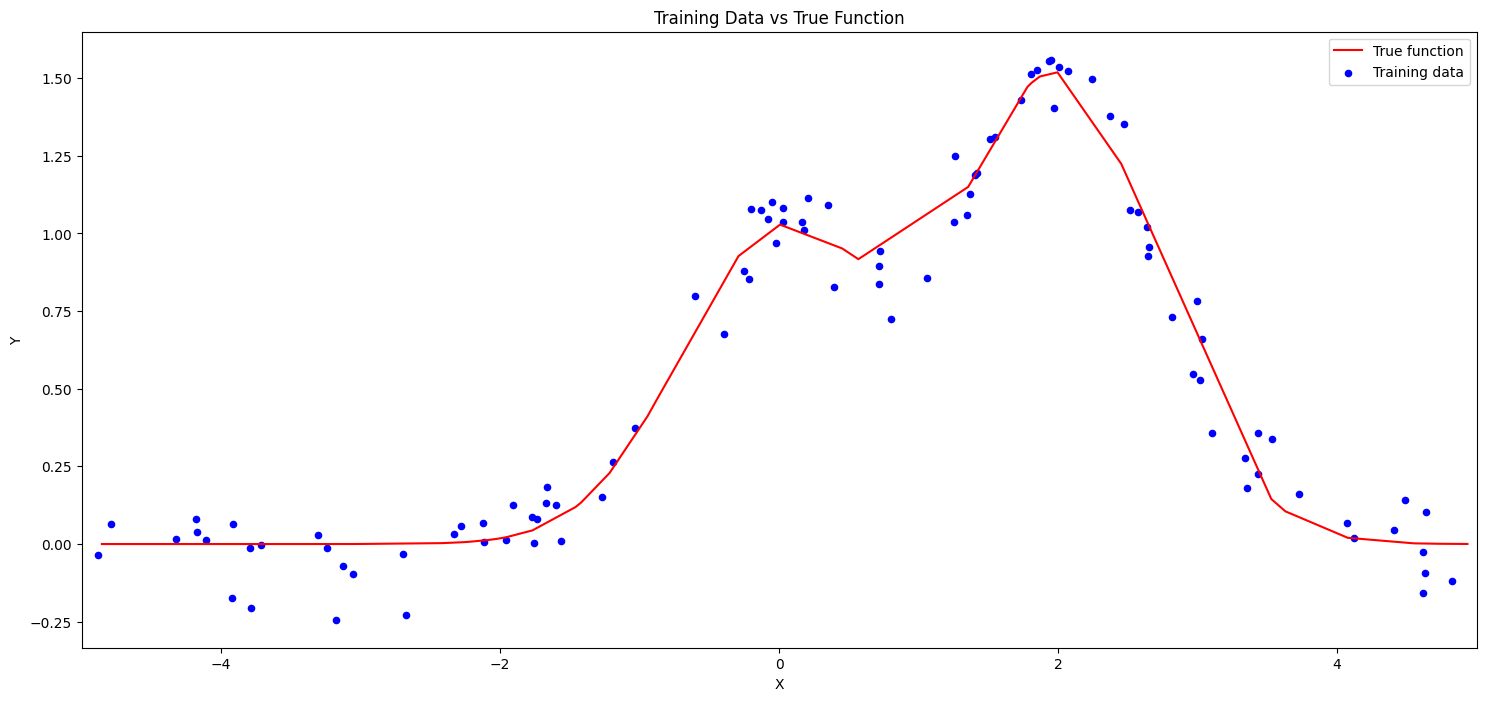

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

# Plot true function (curve)
plt.plot(X_test, f(X_test), "r", label="True function")

# Plot training data points
plt.scatter(X_train, y_train, c="b", s=20, label="Training data")

plt.xlim([-5, 5])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data vs True Function")
plt.legend()
plt.show()

# one input nad 1 output :  regression model :


**applying decision tree regressor**

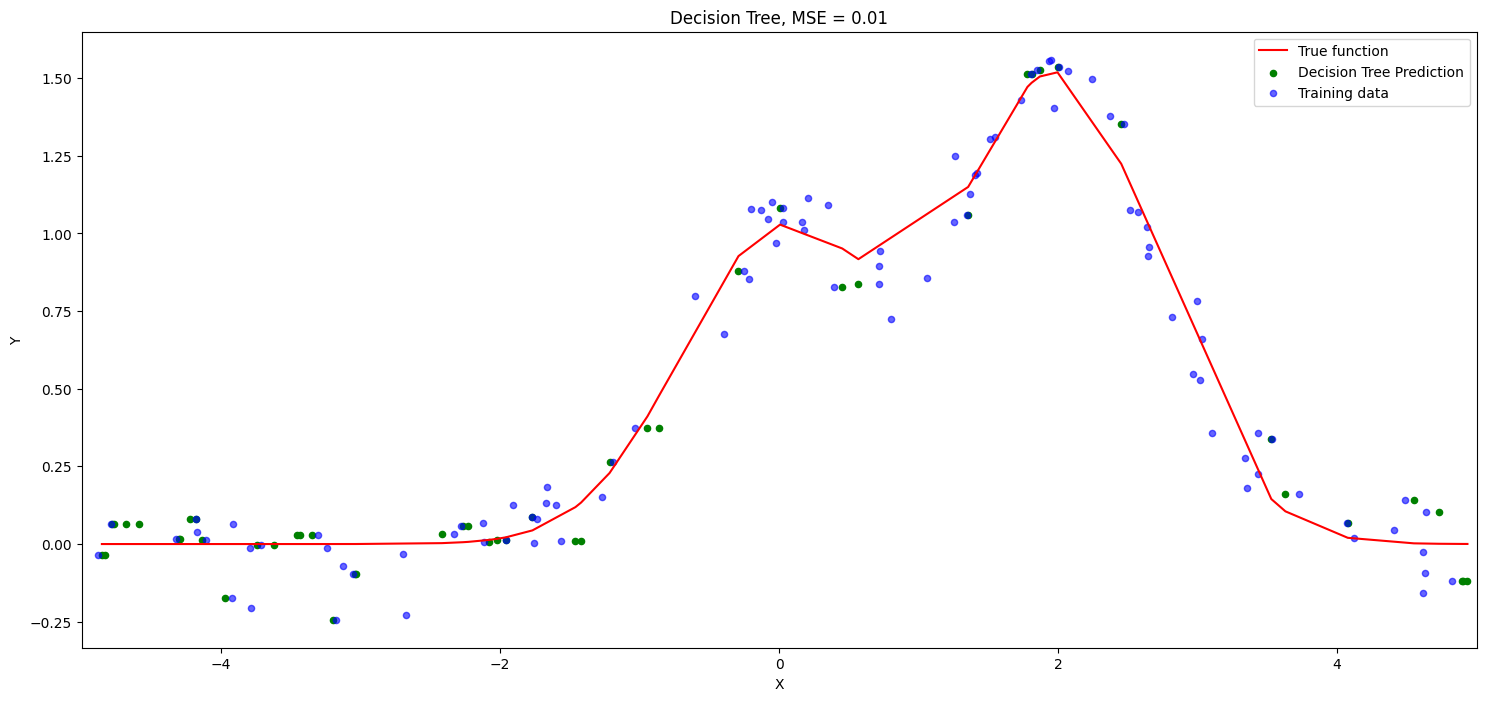

In [119]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Fit Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

# Predict on test data
d_predict = dtree.predict(X_test)

# Plot
plt.figure(figsize=(18, 8))

# True function (smooth red curve)
plt.plot(X_test, f(X_test), "r", label="True function")

# Decision Tree predictions (green points)
plt.scatter(X_test, d_predict, c="g", label="Decision Tree Prediction", s=20)

# Training data (blue points)
plt.scatter(X_train, y_train, c="b", label="Training data", s=20, alpha=0.6)

plt.xlim([-5, 5])
plt.title("Decision Tree, MSE = %.2f" % np.mean((y_test - d_predict.reshape(-1,1))**2))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


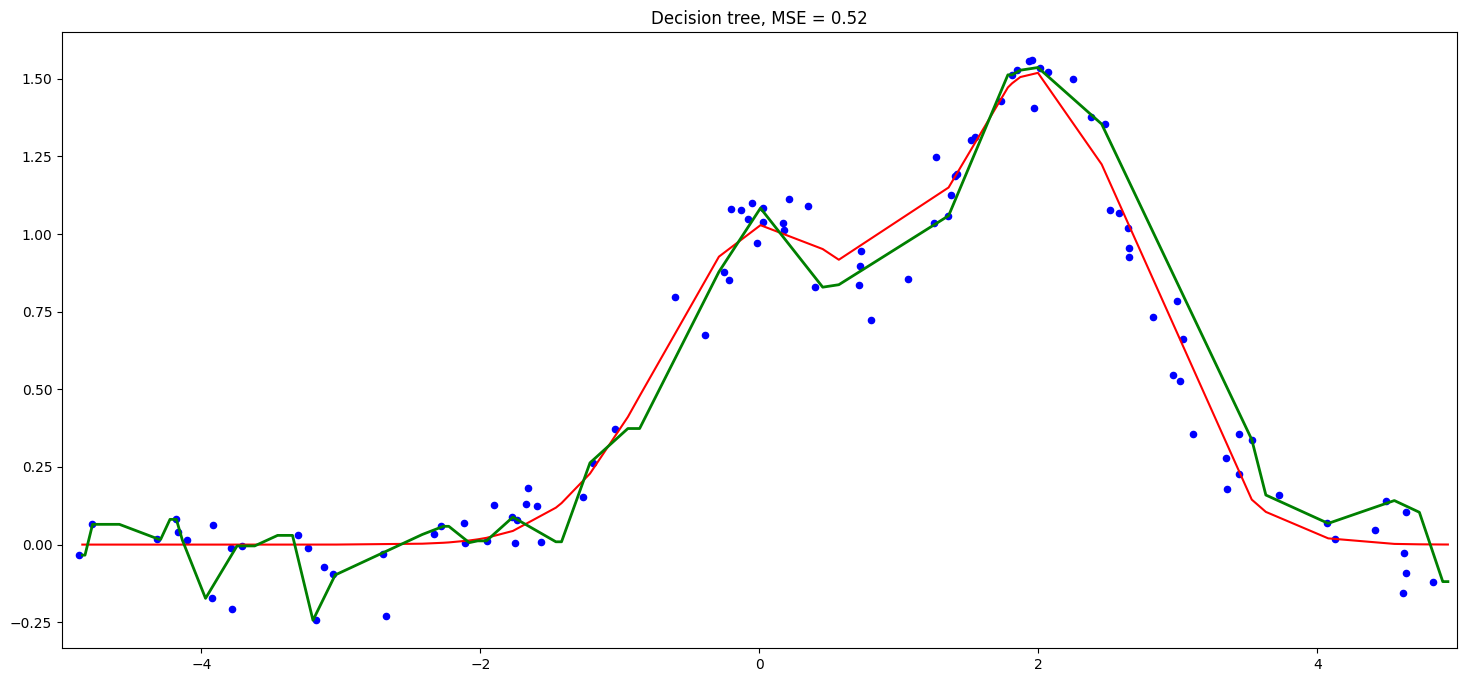

In [122]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Ek decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")                     # Original function
plt.scatter(X_train, y_train, c="b", s=20)           # Training data
plt.plot(X_test, d_predict, "g", lw=2)               # Prediction

plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" %
          np.mean((y_test - d_predict) ** 2))
plt.show()
